## Algorithem Evaluation

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the Dataset

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
s = df.isna().sum()
s

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

## Seprate independent and dependent features-X and Y

In [6]:
X = df.drop(columns=['PassengerId','Survived','Ticket','Name'])
Y = df[['Survived']]


In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [8]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


## Seprate cat and con from X

In [9]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [10]:
cat

['Sex', 'Cabin', 'Embarked']

In [11]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

## Preprocessing 

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
# NUM pipe
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# CAT pipe
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])

# Combine
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [14]:
x_pre = pre.fit_transform(X).toarray()
x_pre

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ]], shape=(891, 159))

In [15]:
cols = pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Cabin_A10',
       'cat__Cabin_A14', 'cat__Cabin_A16', 'cat__Cabin_A19',
       'cat__Cabin_A20', 'cat__Cabin_A23', 'cat__Cabin_A24',
       'cat__Cabin_A26', 'cat__Cabin_A31', 'cat__Cabin_A32',
       'cat__Cabin_A34', 'cat__Cabin_A36', 'cat__Cabin_A5',
       'cat__Cabin_A6', 'cat__Cabin_A7', 'cat__Cabin_B101',
       'cat__Cabin_B102', 'cat__Cabin_B18', 'cat__Cabin_B19',
       'cat__Cabin_B20', 'cat__Cabin_B22', 'cat__Cabin_B28',
       'cat__Cabin_B3', 'cat__Cabin_B30', 'cat__Cabin_B35',
       'cat__Cabin_B37', 'cat__Cabin_B38', 'cat__Cabin_B39',
       'cat__Cabin_B4', 'cat__Cabin_B41', 'cat__Cabin_B42',
       'cat__Cabin_B49', 'cat__Cabin_B5', 'cat__Cabin_B50',
       'cat__Cabin_B51 B53 B55', 'cat__Cabin_B57 B59 B63 B66',
       'cat__Cabin_B58 B60', 'cat__Cabin_B69', 'cat__Cabin_B71',
       'cat__Cabin_B73', 'cat__Cabin_B77', 'cat__Cabin_B78',
       '

In [16]:
x_pre = pd.DataFrame(x_pre,columns=cols)
x_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,...,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Embarked_unknown
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Apply train test split

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x_pre,Y,test_size=0.30,random_state=42)

In [18]:
xtrain.shape

(623, 159)

In [19]:
xtest.shape

(268, 159)

## Algorithem  Evaluation

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [21]:
dct = {'Logistic':LogisticRegression(),
       'Decision Tree':DecisionTreeClassifier(),
       'Random Forest':RandomForestClassifier(),
       'Gradient Boost':GradientBoostingClassifier(),
       'KNN':KNeighborsClassifier(),
       'SVM':SVC()}

In [22]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier()), ('KNN', KNeighborsClassifier()), ('SVM', SVC())])

In [23]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict train and test results
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate F1 score in training
    f1_tr = f1_score(ytrain, ypred_tr)
    tr.append(f1_tr)
    # Calculate F1 Score in train Cross validated
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1')
    f1_cv = scores.mean()
    tr_cv.append(f1_cv)
    # Calculate F1 score in testing
    f1_ts = f1_score(ytest, ypred_ts)
    ts.append(f1_ts)
    # Print the results for model
    print(f'Model Name : {name}\n')
    print(f'Training F1 : {f1_tr:.4f}')
    print(f'Training F1 CV : {f1_cv:.4f}')
    print(f'Testing F1 : {f1_ts:.4f}')
    print('\n=================================================\n')

Model Name : Logistic

Training F1 : 0.7578
Training F1 CV : 0.7138
Testing F1 : 0.7583


Model Name : Decision Tree

Training F1 : 0.9757
Training F1 CV : 0.6901
Testing F1 : 0.6972


Model Name : Random Forest

Training F1 : 0.9757
Training F1 CV : 0.7412
Testing F1 : 0.7184


Model Name : Gradient Boost

Training F1 : 0.8531
Training F1 CV : 0.7488
Testing F1 : 0.7208


Model Name : KNN

Training F1 : 0.7890
Training F1 CV : 0.6919
Testing F1 : 0.7264


Model Name : SVM

Training F1 : 0.7682
Training F1 CV : 0.7440
Testing F1 : 0.7788




## Create a Dataframe to show result

In [24]:
dct.keys()

dict_keys(['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'KNN', 'SVM'])

In [25]:
eval_dct = {'Model_name': list(dct.keys()),
            'Train F1' : tr,
            'Test F1' : ts,
            'Train F1 CV': tr_cv}

In [26]:
eval_df = pd.DataFrame(eval_dct)
eval_df

,Model_name,Train F1,Test F1,Train F1 CV
0,Logistic,0.757848,0.758294,0.713840
1,Decision Tree,0.975717,0.697248,0.690102
2,Random Forest,0.975717,0.718447,0.741153
3,Gradient Boost,0.853081,0.720812,0.748762
4,KNN,0.788991,0.726368,0.691936
5,SVM,0.768182,0.778846,0.744042


In [27]:
eval_df.sort_values(by='Train F1 CV',ascending=False)


,Model_name,Train F1,Test F1,Train F1 CV
3,Gradient Boost,0.853081,0.720812,0.748762
5,SVM,0.768182,0.778846,0.744042
2,Random Forest,0.975717,0.718447,0.741153
0,Logistic,0.757848,0.758294,0.713840
4,KNN,0.788991,0.726368,0.691936
1,Decision Tree,0.975717,0.697248,0.690102


## Best model selectted is Gradient bossting because of highest f1 cv score of 0.7540>0 

### Building the best modle 

In [28]:
best_modle = GradientBoostingClassifier()
best_modle.fit(xtrain,ytrain)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [29]:
best_modle.score(xtrain,ytrain)

0.9036918138041734

In [30]:
best_modle.score(xtest,ytest)

0.8022388059701493

## Plot  confusion Matrix

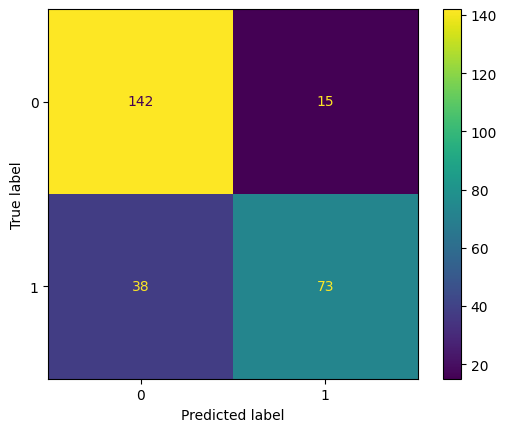

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_modle, xtest , ytest)

## Print Classfication report 

In [32]:
ypred_train = best_modle.predict(xtrain)
ypred_test = best_modle.predict(xtest)

In [33]:
from sklearn.metrics import classification_report 
print(classification_report(ytest , ypred_test))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       157
           1       0.83      0.66      0.73       111

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.80      0.80       268



## Plot the ROC AUC Curve for train and  test 

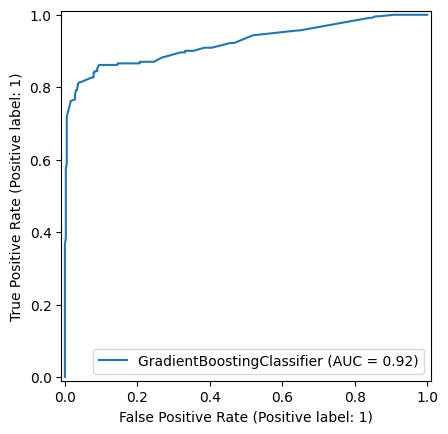

In [34]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_modle,xtrain,ytrain)

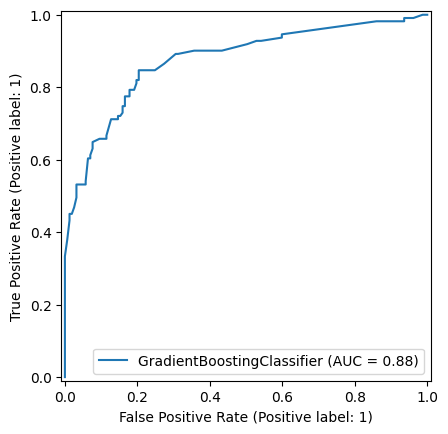

In [35]:
RocCurveDisplay.from_estimator(best_modle,xtest ,ytest)

In [36]:
scores_auc=cross_val_score(best_modle , xtrain , ytrain, cv = 5 ,scoring = 'roc_auc')
scores_auc

array([0.80169122, 0.90850303, 0.77834342, 0.8872631 , 0.89186176])

In [37]:
scores_auc.mean()

np.float64(0.8535325054848115)

# ROC_AUC score is more than 80% hence above modle is good modle


## Predict out of sample data

In [38]:
xnew = pd.read_csv("test_titanic.csv")
xnew .head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [40]:
xnew_pre = pre.transform(xnew)
xnew_pre

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3298 stored elements and shape (418, 159)>

In [41]:
preds=best_modle.predict(xnew_pre)
probs= best_modle.predict_proba(xnew_pre) 

In [42]:
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [43]:
probs

array([[0.86896283, 0.13103717],
       [0.70633015, 0.29366985],
       [0.89904148, 0.10095852],
       [0.88893324, 0.11106676],
       [0.54071567, 0.45928433],
       [0.88893324, 0.11106676],
       [0.26517784, 0.73482216],
       [0.88605993, 0.11394007],
       [0.23667018, 0.76332982],
       [0.88560329, 0.11439671],
       [0.88893324, 0.11106676],
       [0.90962183, 0.09037817],
       [0.06747925, 0.93252075],
       [0.90962183, 0.09037817],
       [0.08563334, 0.91436666],
       [0.08037832, 0.91962168],
       [0.86565097, 0.13434903],
       [0.84705845, 0.15294155],
       [0.54785378, 0.45214622],
       [0.34471734, 0.65528266],
       [0.80161552, 0.19838448],
       [0.63462037, 0.36537963],
       [0.09129732, 0.90870268],
       [0.75056391, 0.24943609],
       [0.06251932, 0.93748068],
       [0.90962183, 0.09037817],
       [0.04731213, 0.95268787],
       [0.84705845, 0.15294155],
       [0.78451903, 0.21548097],
       [0.84269519, 0.15730481],
       [0.

In [44]:
preds[0:5]

array([0, 0, 0, 0, 0])

In [45]:
probs[0:5]

array([[0.86896283, 0.13103717],
       [0.70633015, 0.29366985],
       [0.89904148, 0.10095852],
       [0.88893324, 0.11106676],
       [0.54071567, 0.45928433]])

In [46]:
prob_sur = probs[:,1]
prob_sur

array([0.13103717, 0.29366985, 0.10095852, 0.11106676, 0.45928433,
       0.11106676, 0.73482216, 0.11394007, 0.76332982, 0.11439671,
       0.11106676, 0.09037817, 0.93252075, 0.09037817, 0.91436666,
       0.91962168, 0.13434903, 0.15294155, 0.45214622, 0.65528266,
       0.19838448, 0.36537963, 0.90870268, 0.24943609, 0.93748068,
       0.09037817, 0.95268787, 0.15294155, 0.21548097, 0.15730481,
       0.09037817, 0.11439671, 0.50008709, 0.25303408, 0.56146337,
       0.15294155, 0.45214622, 0.45214622, 0.11106676, 0.34622533,
       0.1567072 , 0.22435383, 0.11476112, 0.8976342 , 0.95402051,
       0.11106676, 0.36326824, 0.13103717, 0.93748068, 0.50008709,
       0.27192081, 0.1567072 , 0.90907658, 0.90323937, 0.1567072 ,
       0.11602878, 0.11476112, 0.13160801, 0.11394007, 0.95268787,
       0.11106676, 0.11771735, 0.11106676, 0.73482216, 0.53772345,
       0.90870268, 0.62086723, 0.09037817, 0.36326824, 0.81367157,
       0.62086723, 0.11106676, 0.45214622, 0.36326824, 0.95268

# Save above results in dataframe

In [47]:
df_final=xnew[['PassengerId']]
df_final['Survived_pred']= preds
df_final["Probability"] = prob_sur


In [48]:
df_final

,PassengerId,Survived_pred,Probability
0,892,0,0.131037
1,893,0,0.293670
2,894,0,0.100959
3,895,0,0.111067
4,896,0,0.459284
...,...,...,...
413,1305,0,0.111067
414,1306,1,0.952688
415,1307,0,0.114761
416,1308,0,0.111067


<Axes: xlabel='Survived_pred'>

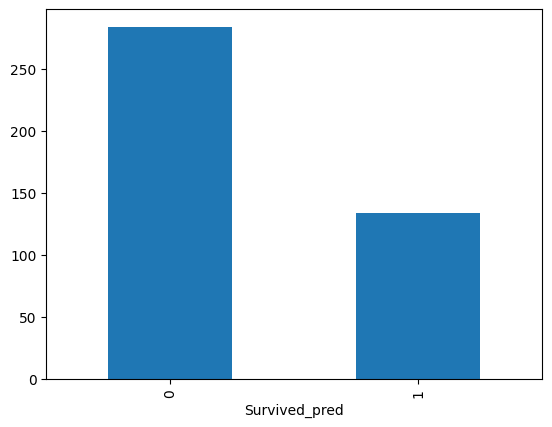

In [49]:
df_final["Survived_pred"].value_counts().plot(kind = 'bar')

In [50]:
df_final.to_csv('Result.csv',index = False)